In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates

#import requests
#import json
from pathlib import Path
import sys
import pickle

import time
from datetime import datetime
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

from scipy.stats import randint

%matplotlib inline

## Function to convert day number to day

In [2]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [3]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [4]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info_final.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info_final.csv')
file_path_pickle = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\Pickle Files\\')

In [5]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

## Set up Time Parmeters - Bike and Weather

In [6]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%Y-%m-%d %H:%M:%S')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df["DAY"] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

In [7]:
df['TIME'] = df['TIME'].dt.round('H')

In [8]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%Y-%m-%d %H:%M:%S')
dfw["sunrise"] = pd.to_datetime(dfw["sunrise"],format='%Y-%m-%d %H:%M:%S')
dfw["sunset"] = pd.to_datetime(dfw["sunset"],format='%Y-%m-%d %H:%M:%S')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['DAY'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['DAY'],np.int64) 
dfw['DAY'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

In [9]:
dfw['TIME'] = dfw['TIME'].dt.round('H')
#dfw['TIME'] .head()

In [10]:
df.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
df.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
df.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
df.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
df.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
df.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
df.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
#df["DAY_name"].unique()

In [11]:
dfw.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
dfw.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
dfw.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
dfw.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
dfw.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
dfw.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
dfw.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
#dfw["DAY_name"].unique()

## Create New Bike parameters 

In [12]:
df['utilisation'] = df['bike_stand_available'] / df['bike_stand']
#df['utilisation'].head()

## Set Up 3 lists to hold the R2 values of Training and Test Random Forest Models + StationID

In [13]:
randommodel_mser_train_list = []
randommodel_mser_test_list = []
randommodel_stationid = []


In [14]:
month_num = 3 #Month
day_num = 4 #Day of the week
hour_num = 12 #Hour
min_num = 15 #Minute pass the hour

## Convert Temperature to Celcius

In [15]:
#Convert from Kelvin to Celcius
dfw["tempcel"] = dfw["temp"]-273.15
dfw["tempcel_feel"] = dfw["temp_feel"]-273.15

## Create new column putting numerical values to weather_main

In [16]:
dfw['weather_main'].replace(['Clouds', 'Rain','Snow','Clear','Drizzle','Mist','Fog'],[2, 4,5,1,3,6,7], inplace=True)
dfw["weather_main"].unique()

array([2, 4, 3, 5, 1, 6, 7], dtype=int64)

In [17]:
dfw["clouds"].unique()

array([ 75,  20,  40, 100,   0,  79,  51,  83], dtype=int64)

In [18]:
dfw["weather_id"].unique()

array([803, 500, 300, 801, 802, 501, 611, 601, 800, 520, 701, 521, 310,
       600, 741, 502, 804], dtype=int64)

In [19]:
dfw["wind_speed"].unique()

array([ 9.77, 10.8 ,  7.2 ,  2.06,  8.23,  2.57,  5.14,  6.69,  4.63,
        5.66,  6.17, 11.32,  9.26,  8.75,  7.72,  4.12, 12.86,  3.09,
        3.6 , 10.29,  1.54,  3.58,  5.81,  8.49,  2.68,  8.05,  7.6 ,
        6.71,  8.94, 11.83,  4.92,  5.36,  4.02,  1.79, 13.38,  1.03,
       10.28, 12.35,  7.15,  2.24,  6.26,  1.34,  4.47, 13.89,  3.13])

In [20]:
dfw["tempcel"].unique()

array([ 1.104e+01,  1.074e+01,  9.450e+00,  2.780e+00,  9.330e+00,
        8.710e+00,  7.580e+00,  6.840e+00,  9.430e+00,  1.045e+01,
        1.225e+01,  8.160e+00,  3.190e+00,  9.970e+00,  6.820e+00,
        4.970e+00,  9.880e+00,  1.217e+01,  3.210e+00,  1.211e+01,
        7.920e+00,  1.338e+01,  7.750e+00,  6.170e+00,  9.140e+00,
        6.360e+00,  3.710e+00,  2.450e+00,  8.020e+00,  1.008e+01,
        2.610e+00,  9.590e+00,  1.325e+01,  8.610e+00,  8.960e+00,
        5.600e-01,  8.470e+00,  3.820e+00,  1.321e+01,  3.100e+00,
        2.770e+00,  7.130e+00,  6.610e+00,  1.680e+00,  8.270e+00,
        8.070e+00,  5.710e+00,  3.510e+00,  4.520e+00,  1.167e+01,
        6.590e+00,  1.498e+01,  6.270e+00,  7.280e+00,  1.657e+01,
        8.830e+00,  4.050e+00,  1.418e+01,  5.480e+00,  1.036e+01,
        3.910e+00,  3.330e+00,  7.900e+00,  6.870e+00,  7.550e+00,
        1.308e+01,  1.075e+01,  6.860e+00,  9.160e+00,  1.270e+01,
        1.170e+01,  3.470e+00,  8.790e+00,  1.127e+01,  5.530e

In [21]:
dfw["tempcel_feel"].unique()

array([10.47,  9.96,  6.17, ..., 10.45, 11.93,  2.49])

## Set up Search Parameters for Bike (Station ID, Month, Day, Hour, Bike Avail., Bike Park.) 

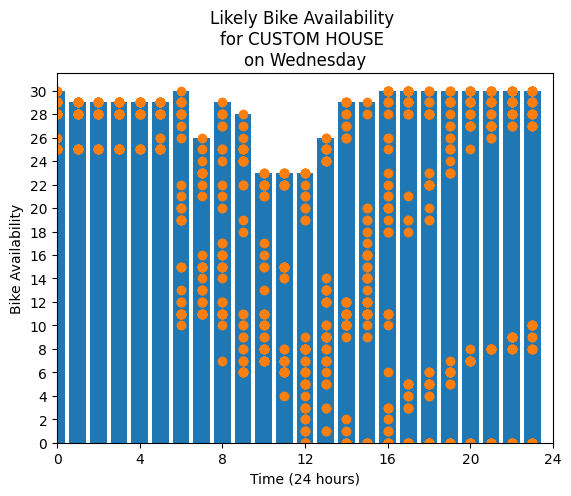

In [22]:
req = 'b'

#Station ID
stationid = 23 #int(input("Enter Station ID (1 to 117): "))
stationname = df.loc[(df['number']==stationid),'name'].values[0]

#Filter data based on certain input parameters
df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['DAY']==day_num-1) & (df['number']==stationid)

## Set up x- and y-axis of Plot
x =df['HOUR'].loc[df['station_select']]

if req == 'b':
    y = df['bike_available'].loc[df['station_select']]
    #y_min = df['bike_available'].loc[df['station_select']].min()
    #y_max = df['bike_available'].loc[df['station_select']].max()
    
    plt.ylabel("Bike Availability")
    plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')

elif req == 'p':
    y = df['bike_stand_available'].loc[df['station_select']]
    plt.ylabel("Bike Parking Availability")
    plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')

#Set Up Plot
plt.xlabel("Time (24 hours)")
ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
plt.xlim(0,24)
plt.bar(x,y)
plt.scatter(x,y)
plt.show()

In [23]:
#y_min.shape,x.shape,y.shape

## Combine the two dataframes - Bike & Weather

In [24]:
df.shape,dfw.shape

((821117, 21), (1678, 23))

In [25]:
dfbikeweath = pd.merge(df, dfw, on='TIME', how='inner')

#dfbikeweath = df.merge(dfw, on="TIME")
#dfbikeweath.shape

## Split Data set to Train and Test sets

In [26]:
train_set,test_set = train_test_split(dfbikeweath,test_size=0.2,random_state=42)
train_set.shape,test_set.shape
#train_set.describe()

((1312692, 43), (328174, 43))

## Create Model of Bike Availability by StationID (Y Axis) 

In [27]:
#stationid = 15
#train_set['station_select'] = (train_set['YEAR_y']==2023) & (train_set['MONTH_y']==3) & (train_set['DAY_y']==3) & (train_set['number']==stationid)
train_set['station_select'] = (train_set['YEAR_y']==2023) & (train_set['MONTH_y']==3) & (train_set['number']==stationid)
y = train_set['bike_available'].loc[train_set['station_select']]
y.shape

(11482,)

## Prepare Features 

In [28]:
weather_features = ['weather_main','clouds','tempcel', 'weather_id', 'wind_speed','tempcel_feel']
#bike_features = ['bike_stand']
#time_features = ['HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']
#all_features = ['weather_main','clouds','tempcel', 'weather_id', 'wind_speed','tempcel_feel','bike_stand','HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']

features = weather_features

## Random Forest Model 

In [29]:
y = train_set['bike_available'].loc[train_set['station_select']]
X = train_set[features].loc[train_set['station_select']]
randomforest = RandomForestRegressor()
randomforest.fit(X, y)
randomforest_predictions = randomforest.predict(X).round(0)

#actual_vs_predicted_randomforest = pd.concat([y,pd.DataFrame(randomforest_predictions, columns=['Predicted'], index=y.index)], axis=1)
#print(f"\nFor {stationname}: ---")
#actual_vs_predicted_randomforest

## Test the Models on the Test Data Set 

In [30]:
test_set['station_select'] = (test_set['YEAR_y']==2023) & (test_set['MONTH_y']==3) & (test_set['number']==stationid)
y_test = test_set['bike_available'].loc[test_set['station_select']]
X_test = test_set[features].loc[test_set['station_select']]

randomforest_predictions_test = randomforest.predict(X_test).round(0)
actual_vs_predicted_randomforest_test = pd.concat([y_test,pd.DataFrame(randomforest_predictions_test, columns=['Model Predicted'], index=y_test.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_randomforest_test


For CUSTOM HOUSE: ---


,bike_available,Model Predicted
38849,13,14.0
772373,9,9.0
955688,21,21.0
1107521,20,20.0
274999,13,14.0
...,...,...
647997,17,16.0
1152700,10,11.0
1337575,14,13.0
500311,25,24.0


In [31]:
#R2 for Training Set Data
randomforest_mse = mean_squared_error(y,randomforest_predictions)
randomforest_mser = np.sqrt(randomforest_mse).round(2)

#R2 for Test Set Data
randomforest_mse_test = mean_squared_error(y_test,randomforest_predictions_test)
randomforest_mser_test = np.sqrt(randomforest_mse_test).round(2)
print(f'Feature(s) are {features} \n\nR2 of Random Tree Regression Model (for Training Data Set) = {randomforest_mser} ')
print(f'                         versus:--- \nR2 of Random Tree Regression Model (for Test Data Set) = {randomforest_mser_test} \n')

randommodel_mser_test_list.append(randomforest_mser_test)
randommodel_mser_train_list.append(randomforest_mser)
randommodel_stationid.append(stationid)

Feature(s) are ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 

R2 of Random Tree Regression Model (for Training Data Set) = 1.68 
                         versus:--- 
R2 of Random Tree Regression Model (for Test Data Set) = 1.88 



In [32]:
for i in range(len(randommodel_stationid)):
    print(f'For station: {randommodel_stationid[i]} | R2 (Training) = {randommodel_mser_train_list[i]} -- R2 (Test) = {randommodel_mser_test_list[i]}')

For station: 23 | R2 (Training) = 1.68 -- R2 (Test) = 1.88


## Write the model to a pickle file 

In [33]:
# Serialize model object (in this case Random Forest) into a file on disk using pickle
filename = f'{file_path_pickle}\\randomforest{stationid}_test.pkl'
print(filename)
with open(filename, 'wb') as handle:
    pickle.dump(randomforest, handle, pickle.HIGHEST_PROTOCOL)

C:\Users\corma\Documents\GitHub\Dublin-Bikes-Helper\MachineLearn_DBH\Pickle Files\randomforest23_test.pkl


## Open Pickle File 

In [34]:
model_results = pickle.load(open(filename,"rb"))
type(model_results)

sklearn.ensemble._forest.RandomForestRegressor

## Use Pickle File to make a prediction 

In [35]:
test_set['station_select'] = (test_set['YEAR_y']==2023) & (test_set['MONTH_y']==3) & (test_set['number']==stationid)
y_test = test_set['bike_available'].loc[test_set['station_select']]
X_test = test_set[features].loc[test_set['station_select']]

randomforest_pickle_predictions = model_results.predict(X_test).round(0)

actual_vs_randomforest_vs_pickle_predictions = pd.concat([y_test,pd.DataFrame(randomforest_predictions_test, columns=['Model Predicted'], index=y_test.index),pd.DataFrame(randomforest_pickle_predictions, columns=['Pickle Predicted'], index=y_test.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_randomforest_vs_pickle_predictions


For CUSTOM HOUSE: ---


,bike_available,Model Predicted,Pickle Predicted
38849,13,14.0,14.0
772373,9,9.0,9.0
955688,21,21.0,21.0
1107521,20,20.0,20.0
274999,13,14.0,14.0
...,...,...,...
647997,17,16.0,16.0
1152700,10,11.0,11.0
1337575,14,13.0,13.0
500311,25,24.0,24.0


In [36]:
column_names = test_set.columns.values.tolist()
print(column_names[6],column_names[24:26],column_names[28:30],column_names[-2:])
#6,24,25,28,29,-2,-1

bike_available ['weather_id', 'weather_main'] ['wind_speed', 'clouds'] ['tempcel', 'tempcel_feel']


In [37]:
#Input the Index number form Table above to check if gives the same predicted value
row_list = test_set.loc[500311, :].values.flatten().tolist()
print(row_list[6],row_list[24:26],row_list[28:30],row_list[-2:])

25 [500, 4] [5.14, 75] [3.2600000000000477, -0.9099999999999682]


In [38]:
#StationID
#web_stationid = 15

#Day of the Week
#web_day = 3

#Hour of the Day
#web_hour = 13
  
#Weather Data from the particular row selected above
web_weather_main = row_list[25]
web_clouds = row_list[29]
web_tempcel = row_list[-2]
weather_id = row_list[24]
wind_speed = row_list[28]
tempcel_feel = row_list[-1]

In [39]:
X_web = [[web_weather_main,web_clouds,web_tempcel, weather_id, wind_speed,tempcel_feel]]

In [40]:
y_web = model_results.predict(X_web)

C:\Users\corma\anaconda3\envs\comp30830\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
print(int(y_web.round(0)))

24


## Plot the Pickle File Predictions 

#Filter data based on certain input parameters
df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['DAY']==day_num-1) & (df['number']==stationid)

## Set up x- and y-axis of Plot
x =df['HOUR'].loc[df['station_select']]

if req == 'b':
    y = df['bike_available'].loc[df['station_select']]
    plt.ylabel("Bike Availability")
    plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')

elif req == 'p':
    y = df['bike_stand_available'].loc[df['station_select']]
    plt.ylabel("Bike Parking Availability")
    plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')

#Set Up Plot
plt.xlabel("Time (24 hours)")
ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
plt.xlim(0,24)
plt.bar(x,y)
plt.scatter(x,y)
plt.show()

In [ ]:
#stationid = 15
#train_set['station_select'] = (train_set['YEAR_y']==2023) & (train_set['MONTH_y']==3) & (train_set['DAY_y']==3) & (train_set['number']==stationid)
train_set['station_select'] = (train_set['YEAR_y']==2023) & (train_set['MONTH_y']==3) & (train_set['DAY_y']==3) & (train_set['number']==stationid)
y = train_set['bike_available'].loc[train_set['station_select']]
y.shape

In [ ]:
#Weather Data from the particular row selected above
web_weather_main = row_list[25]
web_clouds = row_list[29]
web_tempcel = row_list[-2]
weather_id = row_list[24]
wind_speed = row_list[28]
tempcel_feel = row_list[-1]